# TM10007 Assignment template

In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/StijnHuitenga/TM10007_ML_Project.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [15]:
##Data loading functions. Uncomment the one you want to use
#from worcgist.load_data import load_data
from worclipo.load_data import load_data
# from worcliver.load_data import load_data
import pandas as pd
#from ecg.load_data import load_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import decomposition

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

# feature space splitsen in labels en features
features = pd.DataFrame(data)
ground_truth = data['label']
features.pop('label')
ground_truth = ground_truth.map(lambda x: 1 if x == 'liposarcoma' else 0)

#features met alleen maar missing data verwijderen
zero_columns = [column for column in features.columns if (features[column] == 0).all()]
features = features.drop(columns=zero_columns)
print(f'The number of features (without missing data features): {len(features.columns)}')

#split data
X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=42)
print(f"Aantal samples in training set: {len(X_train)}")
print(f"Aantal samples in test set: {len(X_test)}")

The number of samples: 115
The number of columns: 494
The number of features (without missing data features): 480
Aantal samples in training set: 92
Aantal samples in test set: 23


In [32]:
def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm
# num_cols = X_train.select_dtypes(include=['number']).columns  # Alleen numerieke kolommen
# num_features = len(num_cols)  # Aantal numerieke features
# print(num_features)
# # Instellingen voor het plotten van meerdere histogrammen
# plt.figure(figsize=(15, 12))
# for i, col in enumerate(num_cols[:494]):  # Eerst 20 kolommen om het overzichtelijk te houden
#     plt.subplot(50, 10, i + 1)  # 4 rijen, 5 kolommen per plotpagina
#     sns.histplot(data[col], bins=30, kde=True)
#     plt.title(col)
#     plt.xlabel("")
#     plt.ylabel("Frequentie")

# plt.tight_layout()
# plt.show()

# Controleren voor elke feature of data normaal verdeeld is

In [16]:
from scipy.stats import shapiro
normal_count = 0
not_normal_count = 0
for col in X_train:
  stat, p = shapiro(X_train[col])
  if p > 0.05:
      normal_count += 1
  else:
      not_normal_count += 1
print(normal_count)
print(not_normal_count)
# dus we kiezen voor normalization want data is voor veel features niet normaal verdeeld

72
408


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


# Scalen van feature data

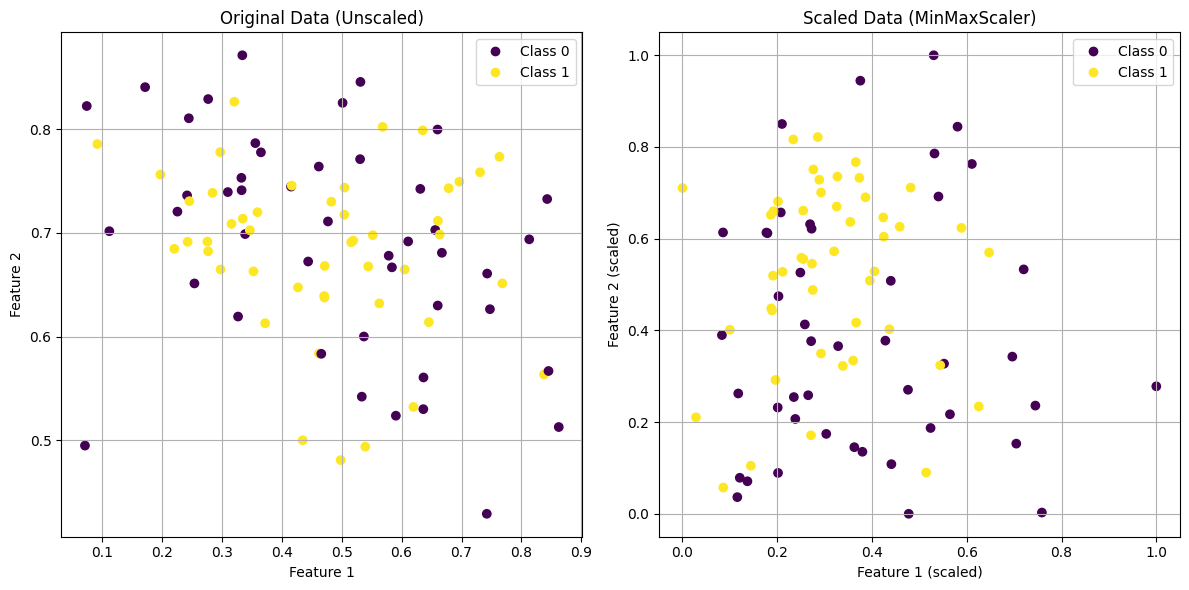

In [46]:
# scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #scaling plotten op de eerste twee features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Eerste subplot
scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 200], c=y_train, label='Original data') #let op, deze plot is anders doordat je een dataframe hebt
plt.title('Original Data (Unscaled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.grid(True)

plt.subplot(1, 2, 2)  # Tweede subplot
scatter = plt.scatter(X_train_scaled[:, 80], X_train_scaled[:, 1], c=y_train, label='Scaled data') #hier heb je te maken met numpy arrays
plt.title('Scaled Data (MinMaxScaler)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature selectie

## Backwards

Optimal number of features : 11


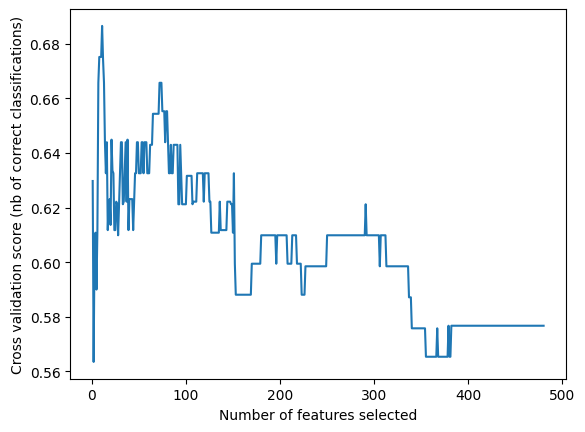

Geselecteerde features: [ 11  16  17  19  20  50  70 263 320 339 474]


In [47]:
# feature selectie
svc = svm.SVC(kernel = 'linear')
rfecv = feature_selection.RFECV(
    estimator=svc, step=1,
    cv=model_selection.StratifiedKFold(8),
    scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()
selected_features = np.where(rfecv.support_)[0]
print("Geselecteerde features:", selected_features)


## Principal component analysis

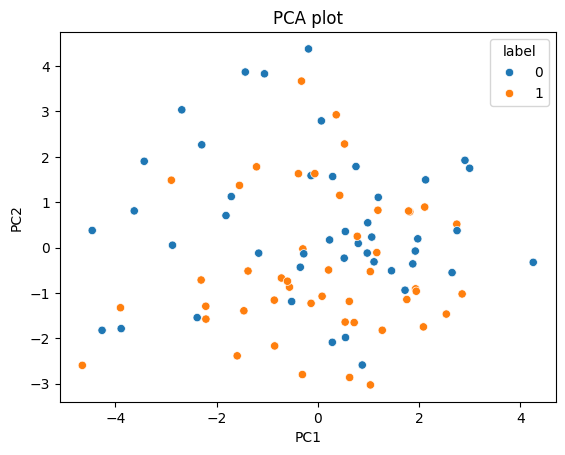

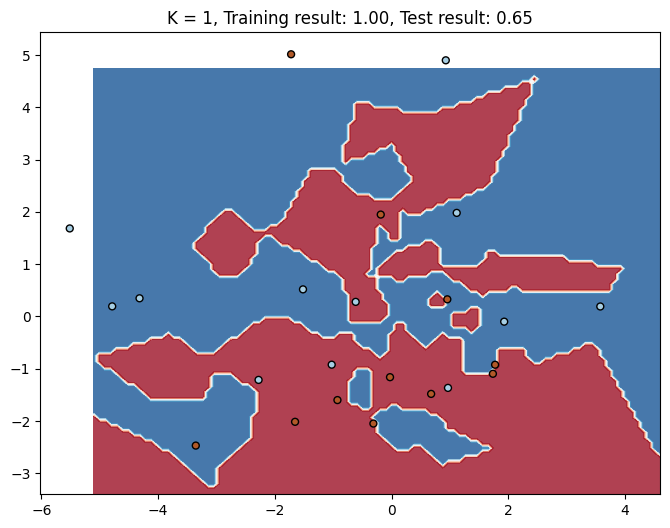

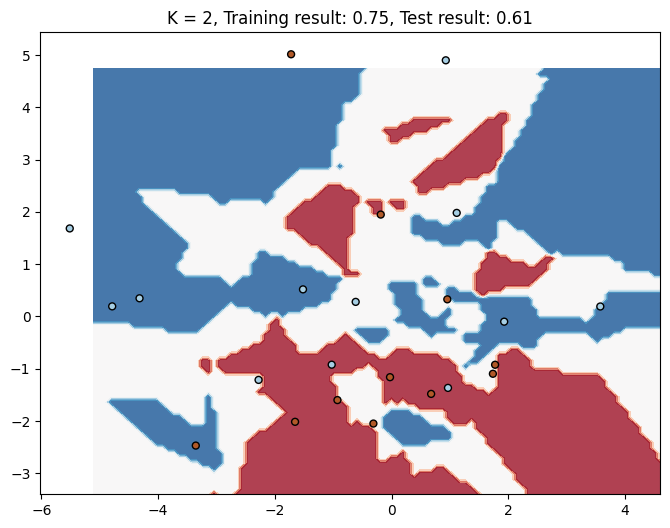

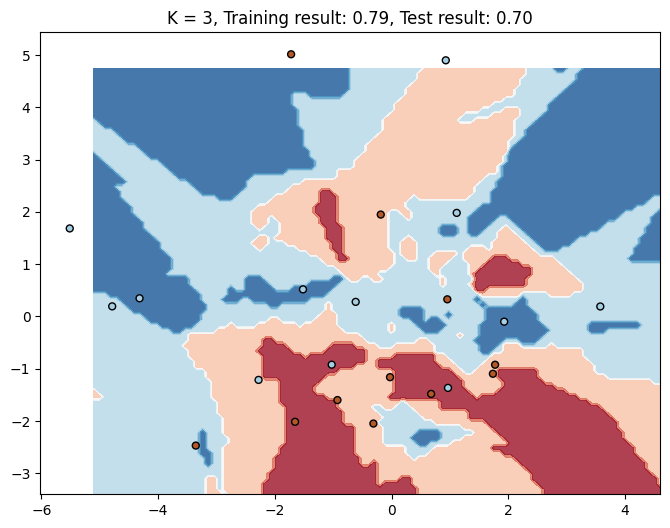

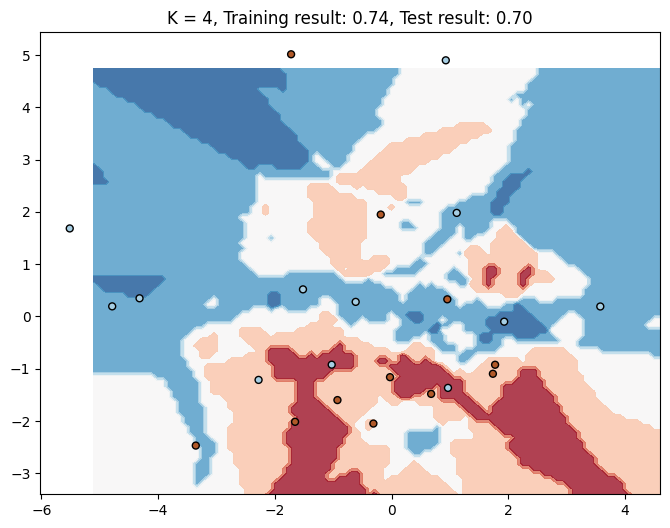

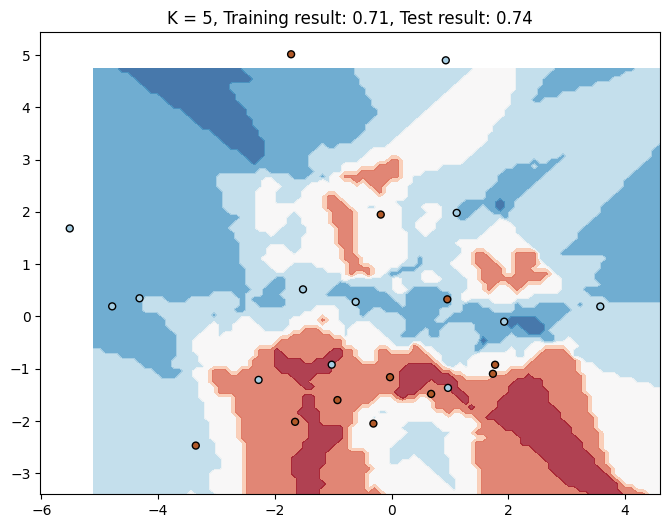

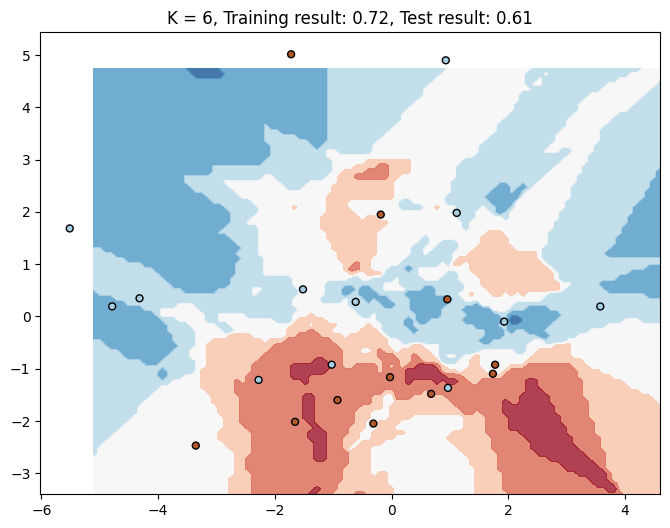

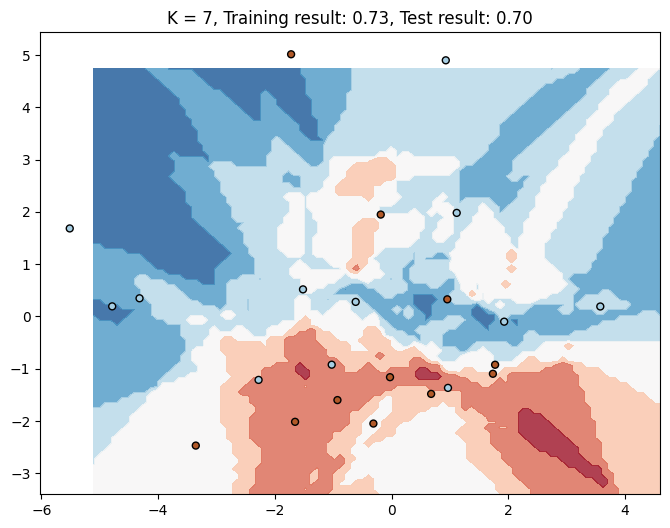

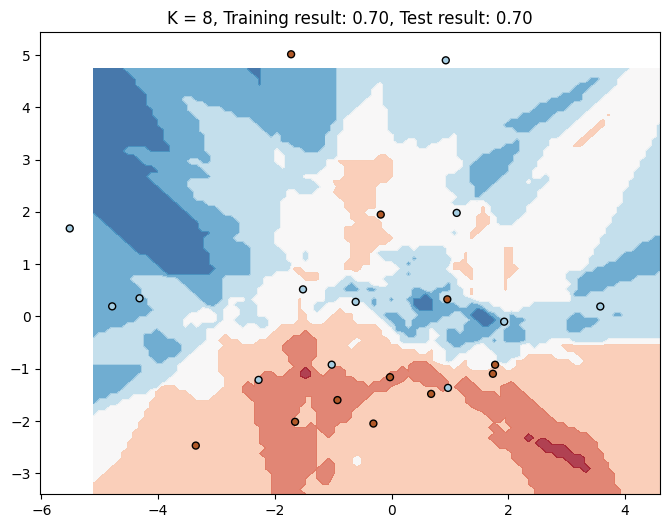

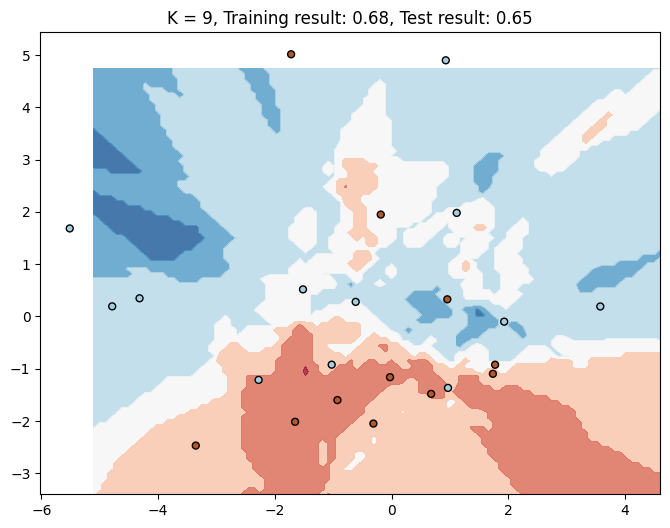

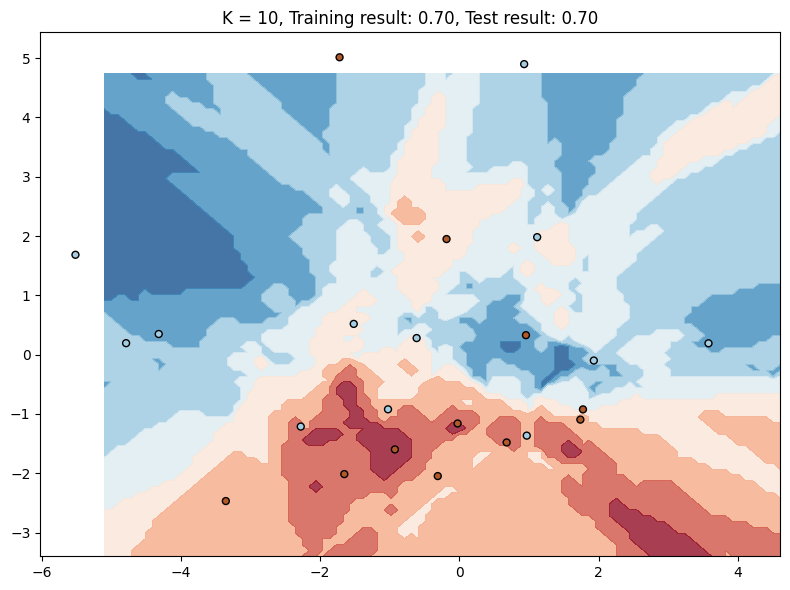

In [48]:
# PCA toepassen
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_scaled)  # Fit PCA op de trainingsdata
X_train_pca = pca.transform(X_train_scaled)  # Transformeer de trainingsdata
X_test_pca = pca.transform(X_test_scaled)  # Transformeer de testdata

# Plot de PCA van de trainingsdata
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.title('PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Loop over verschillende k's
for k in range(1, 11):
    # Train kNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    score_train = knn.score(X_train_pca, y_train)
    score_test = knn.score(X_test_pca, y_test)

    # Plot de beslissingsgrenzen
    fig, ax = plt.subplots(figsize=(8, 6))
    colorplot(knn, ax, X_train_pca[:, 0], X_train_pca[:, 1])
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], marker='o', c=y_test,
               s=25, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(f"K = {k}, Training result: {score_train:.2f}, Test result: {score_test:.2f}")

plt.tight_layout()
plt.show()

In [ ]:
## Finding ID's with missing feature values
zero_value_feature = {}
for id in features.index:
    if (features.loc[id] == 0).any():
        zero_columns = features.columns[features.loc[id] == 0].tolist()  # Find columns where value is 0
        zero_value_feature[id] = zero_columns
    else:
        continue